# Titanic prediction

## Table of Content
- **Data collecttion**
- **Data Cleaning**
- **Feature engineering**
- **Machine Learning Model**

In [35]:
# Importing necessary libraries for our Machine Learning process

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#### Data collection

This is the process of extracting our data from it's original source

In [2]:
# Reading the CSV FILE with pandas library

df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Data Cleaning

This is the process of cleaning our data and getting it ready for our model process

In [4]:
# Checking data types

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Checking columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Replace NaN values with zero in the 'Age'
df['Age'] = df['Age'].fillna(0)


# Convert to int
df['Age'] = df['Age'].astype('int64')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [9]:
# Converting fare column to 2 d.p
df['Fare'] = df['Fare'].round(2)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C


In [11]:
# Check data shape - column and rows

df.shape

(891, 12)

In [12]:
# Check data statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,32.204366
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.693414
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.450000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.330000


In [13]:
# Missing Value 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
import missingno as msno

<Axes: >

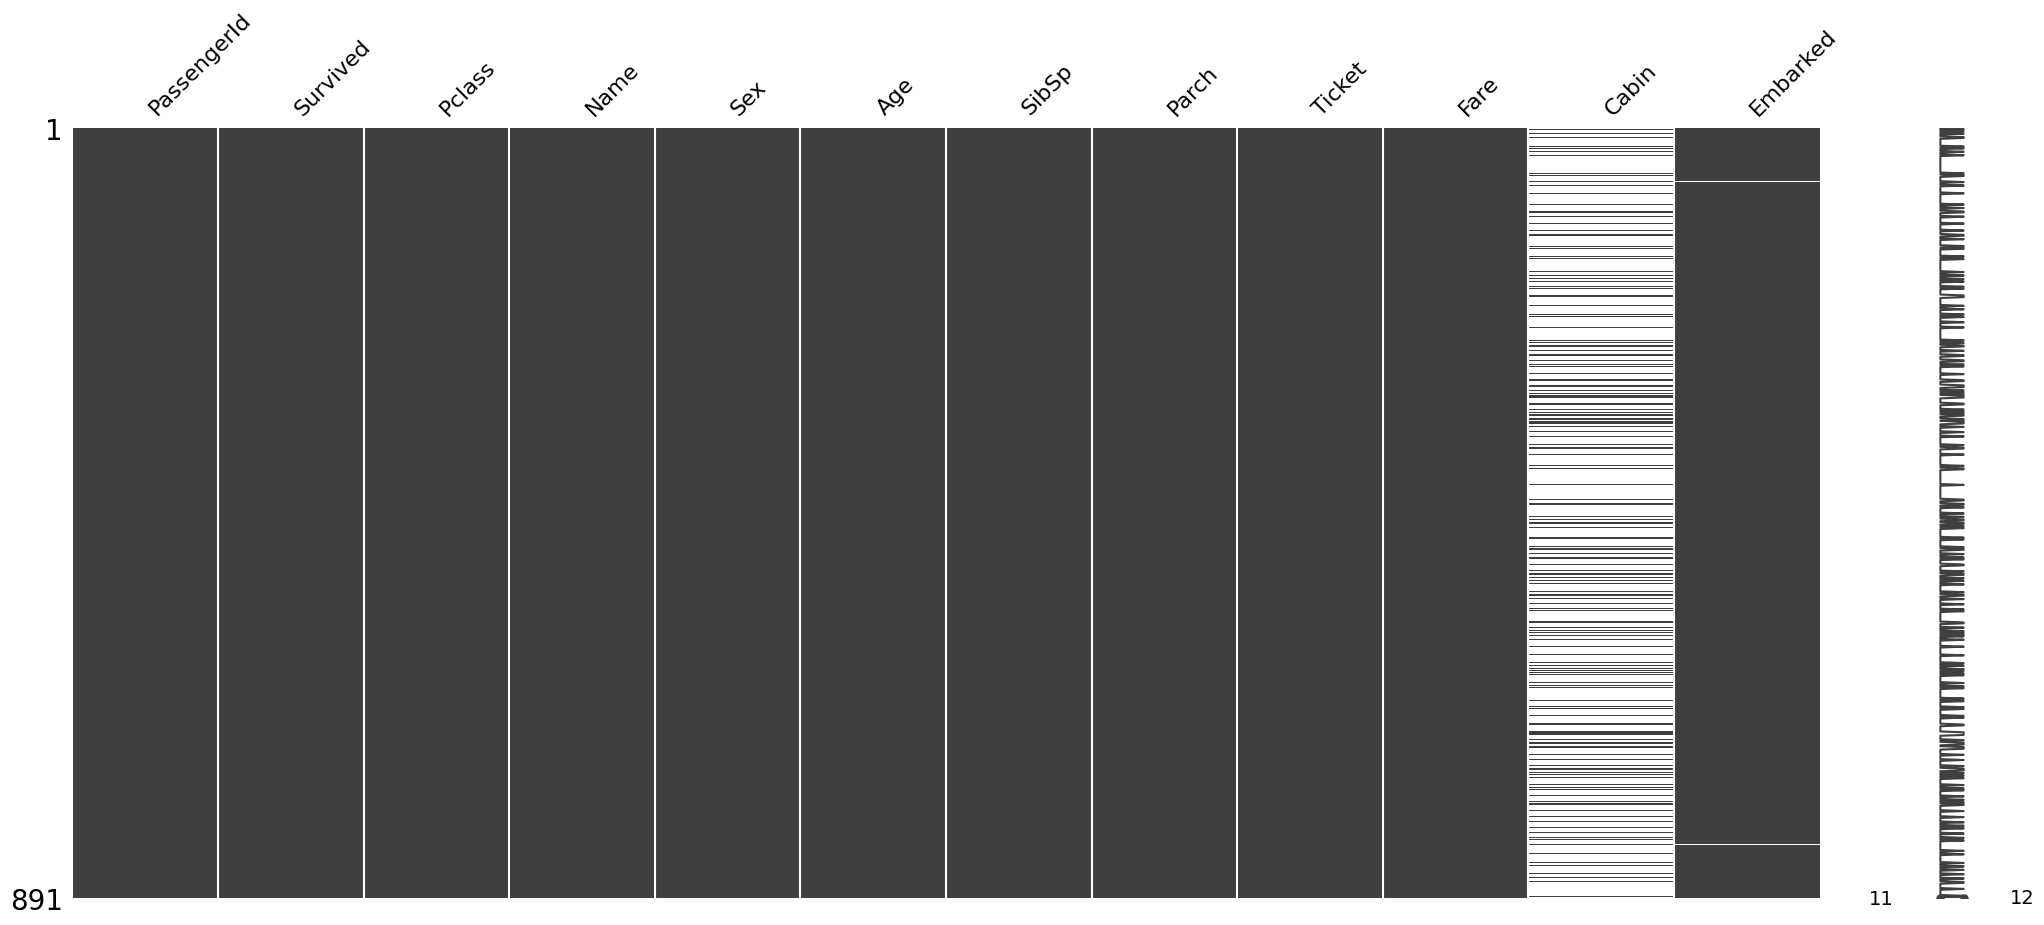

In [15]:
# Visualize missing values using a matrix plot
msno.matrix(df)

<Axes: >

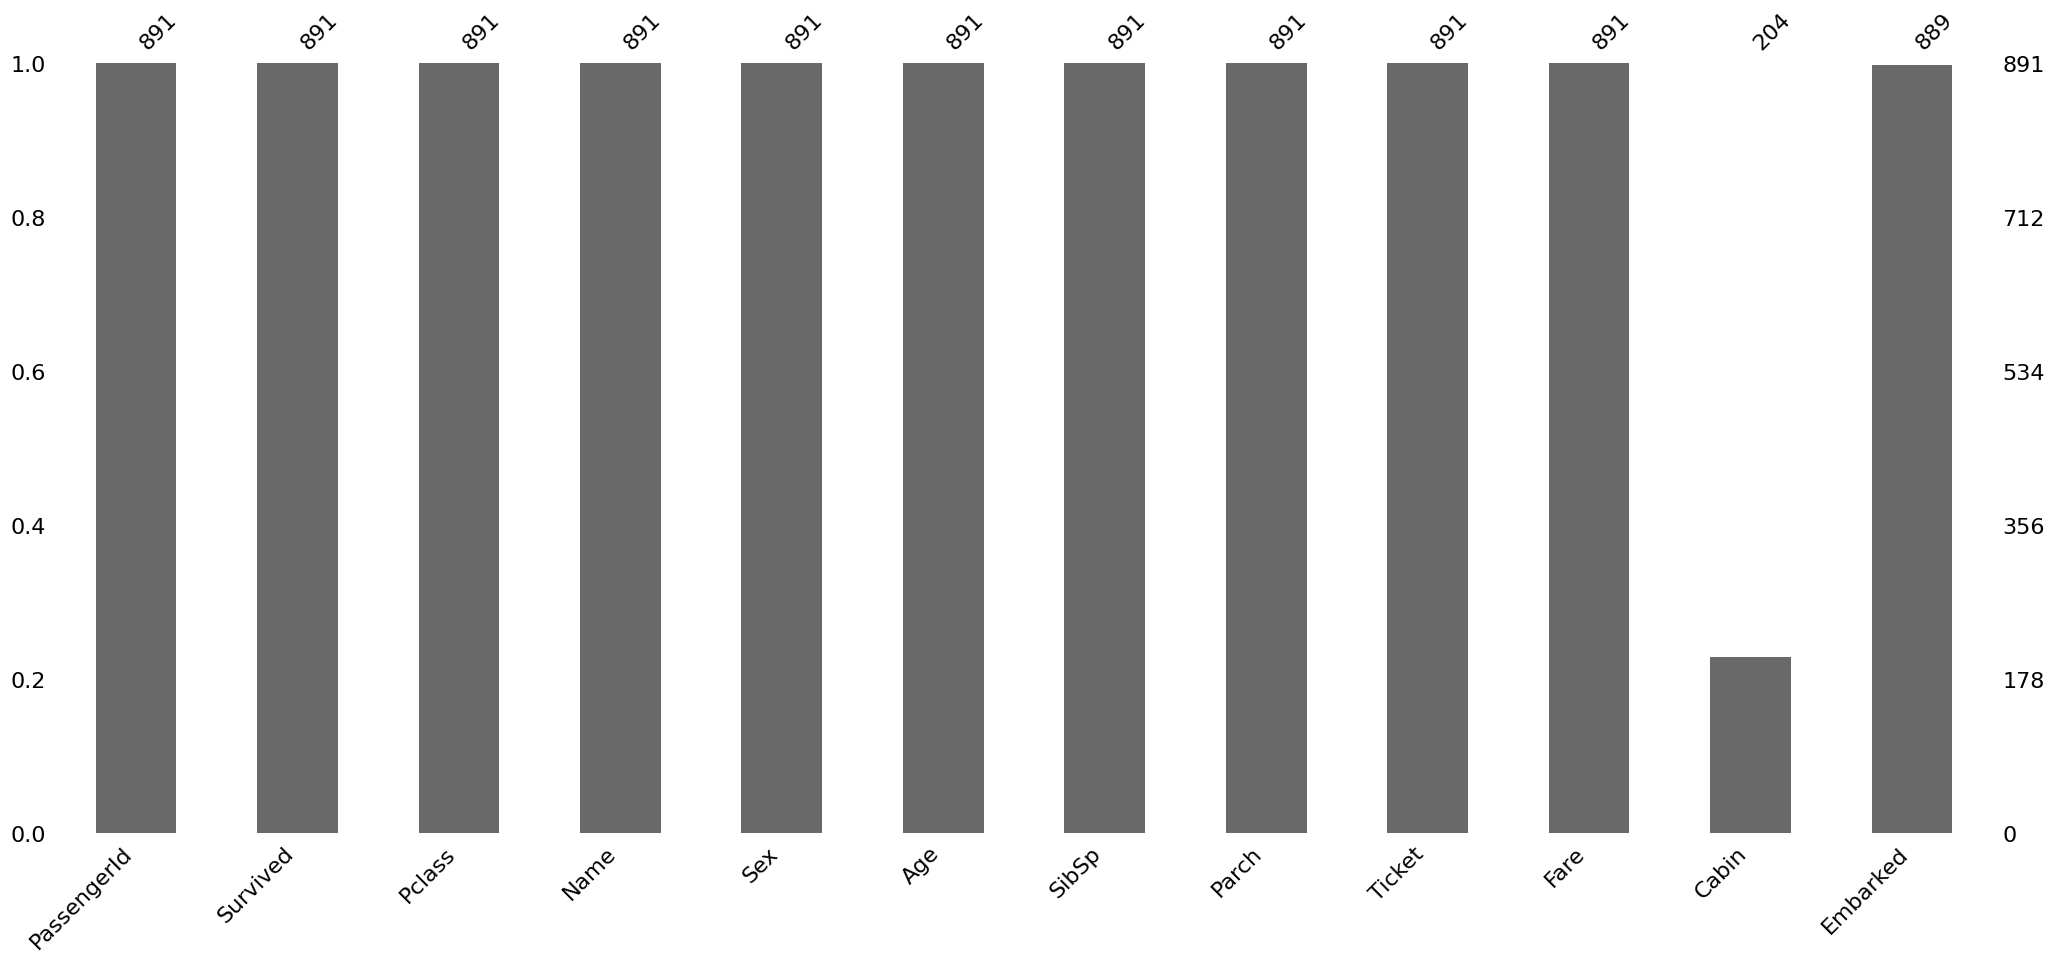

In [16]:
# Visualize missing values using a bar plot
msno.bar(df)

<Axes: >

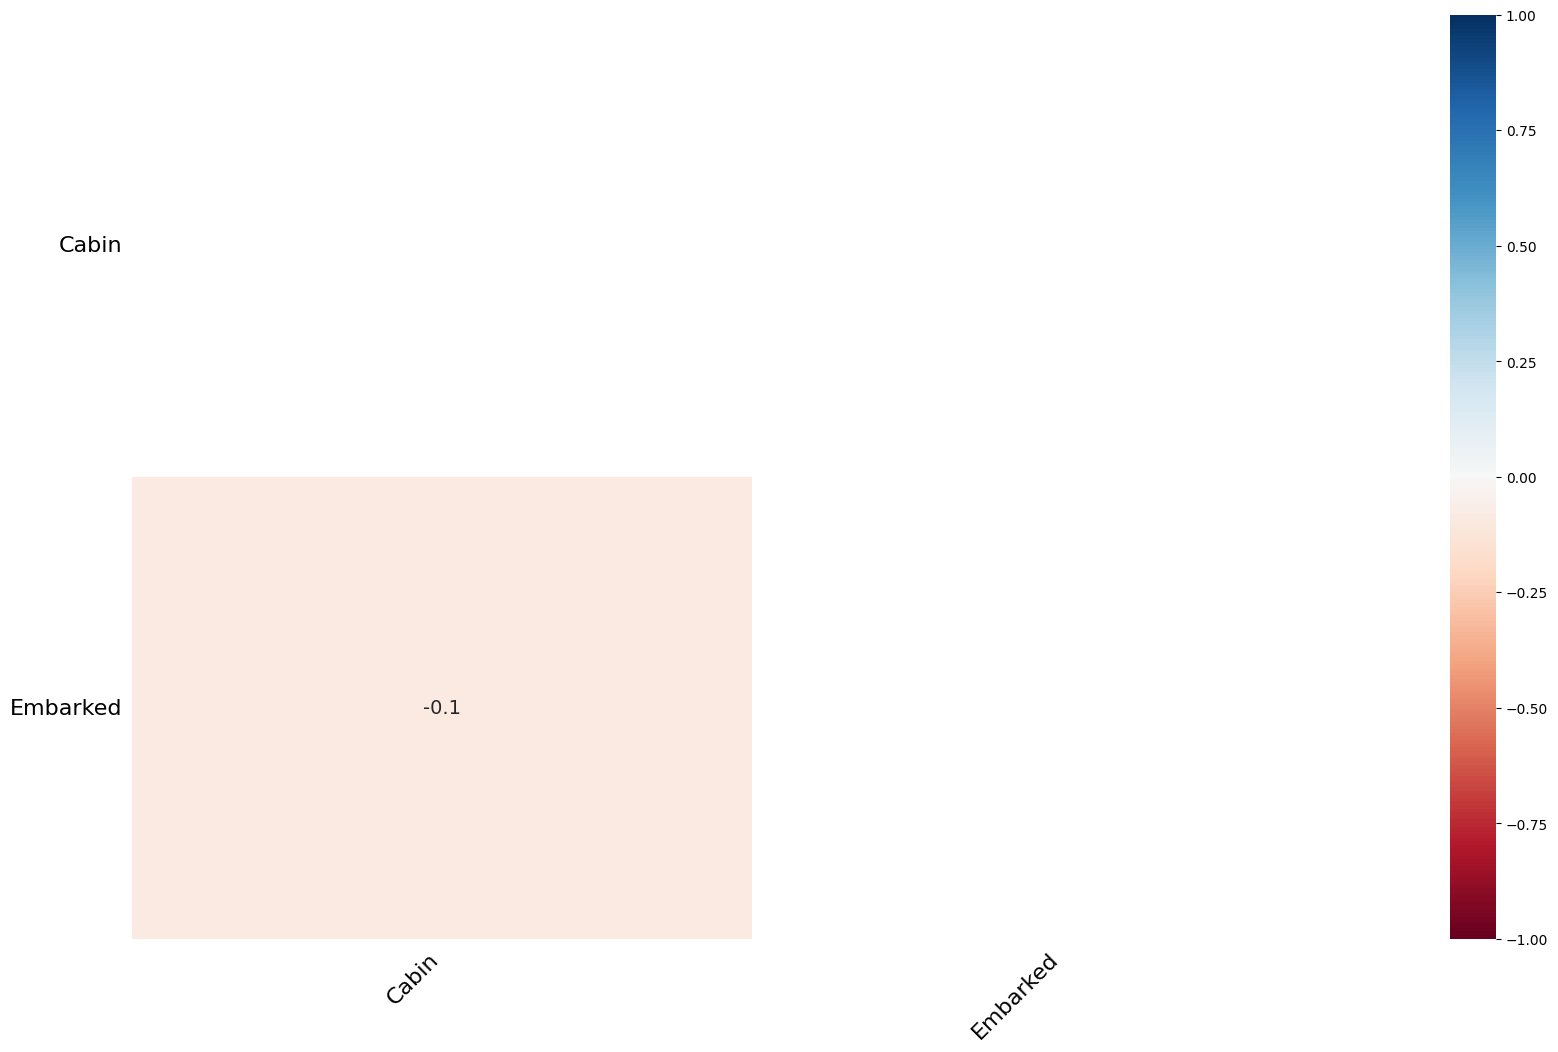

In [17]:
# Visualize missing values using a heatmap
msno.heatmap(df)

In [18]:
# Replace missing values in the 'Cabin' column with "Not available"
df['Cabin'] = df['Cabin'].fillna(value="Not available")

# Replace missing values in the 'Embarked' column with "Not available"
df['Embarked'] = df['Embarked'].fillna(value="Not available")

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Not available,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,Not available,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,Not available,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,Not available,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.45,Not available,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C


In [21]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:", duplicate_rows)


# Count duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

Duplicate rows: Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Number of duplicate rows: 0


In [22]:
def detect_outliers_zscore(data):
    threshold = 3
    outliers = []
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            z_scores = (data[col] - data[col].mean()) / data[col].std()
            outliers.extend(data.index[z_scores.abs() > threshold])
    return list(set(outliers))

# Get outliers
outliers = detect_outliers_zscore(df)
print("Outliers:", outliers)

Outliers: [386, 258, 261, 774, 266, 779, 13, 527, 16, 787, 278, 792, 25, 27, 541, 542, 159, 164, 678, 167, 679, 171, 683, 813, 686, 299, 557, 689, 50, 180, 437, 182, 438, 824, 567, 311, 59, 700, 68, 324, 71, 201, 716, 846, 850, 341, 86, 88, 858, 730, 863, 480, 736, 610, 737, 742, 360, 233, 885, 630, 119, 118, 377, 380, 638]


In [23]:
import pandas as pd

def detect_outliers_zscore(data, threshold=3):
    outlier_columns = {}
    for col in data.select_dtypes(include='number').columns:
        z_scores = (data[col] - data[col].mean()) / data[col].std()
        outliers = data.index[z_scores.abs() > threshold]
        if len(outliers) > 0:
            outlier_columns[col] = outliers
    return outlier_columns

# Assuming 'df' is your DataFrame containing the table data
outlier_columns = detect_outliers_zscore(df)

# Print columns with outliers
print("Columns with outliers:")
for col, outliers in outlier_columns.items():
    print(f"{col}: {len(outliers)} outliers")

Columns with outliers:
Age: 1 outliers
SibSp: 30 outliers
Parch: 15 outliers
Fare: 20 outliers


#### Data Analysis - Understanding the data

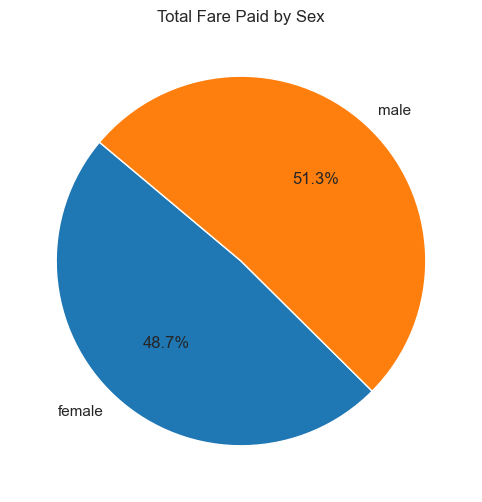

In [26]:
# Total Fare Paid By Sex - More male paid more fare than female passengers

# Group the DataFrame by 'Sex' and calculate the sum of 'Fare'
grouped_df = df.groupby('Sex')['Fare'].sum().reset_index()

# Define colors for each gender
colors = ['#1f77b4', '#ff7f0e']

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(grouped_df['Fare'], labels=grouped_df['Sex'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Total Fare Paid by Sex")
plt.show()

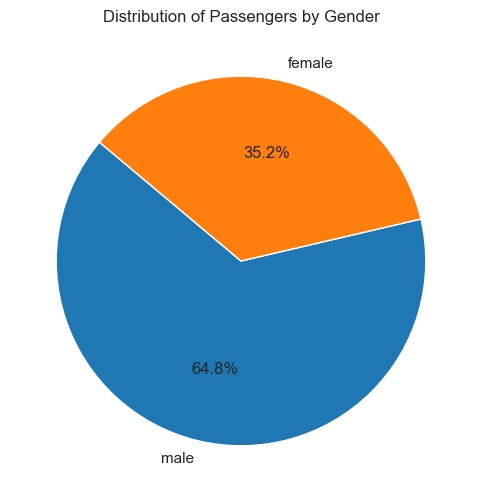

In [27]:
# Grouping the data by 'Sex' column and counting the number of passengers in each category 

# Group the data by 'Sex' column and count the number of passengers in each category
passengers_by_sex = df['Sex'].value_counts().reset_index()

# Rename the columns for clarity
passengers_by_sex.columns = ['Sex', 'Passengers']

# Define colors for each gender
colors = ['#1f77b4', '#ff7f0e']

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(passengers_by_sex['Passengers'], labels=passengers_by_sex['Sex'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Passengers by Gender")
plt.show()

# There were more male passengers than female

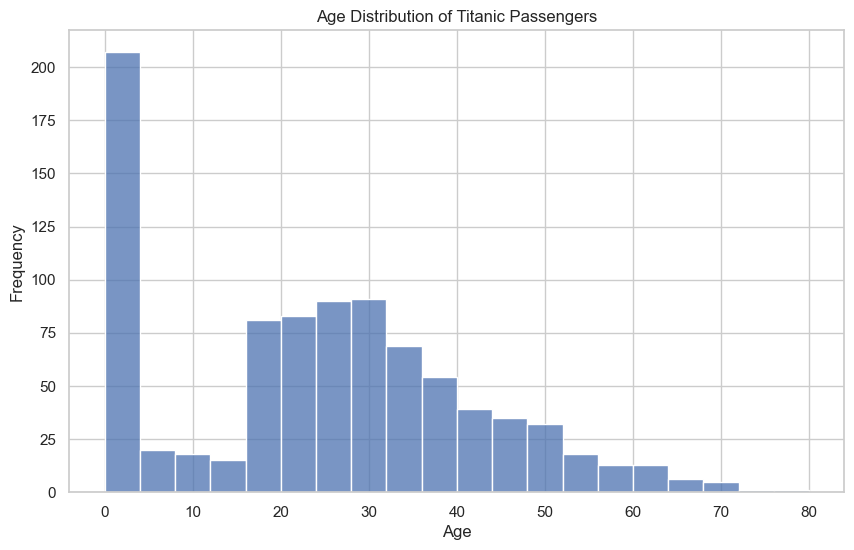

In [36]:
# Age Distribution

# Set the style
sns.set(style="whitegrid")

# Create a histogram of the age distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=False)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Our Distribution shows that our passengers were mostly yiung adults between age 20 -40

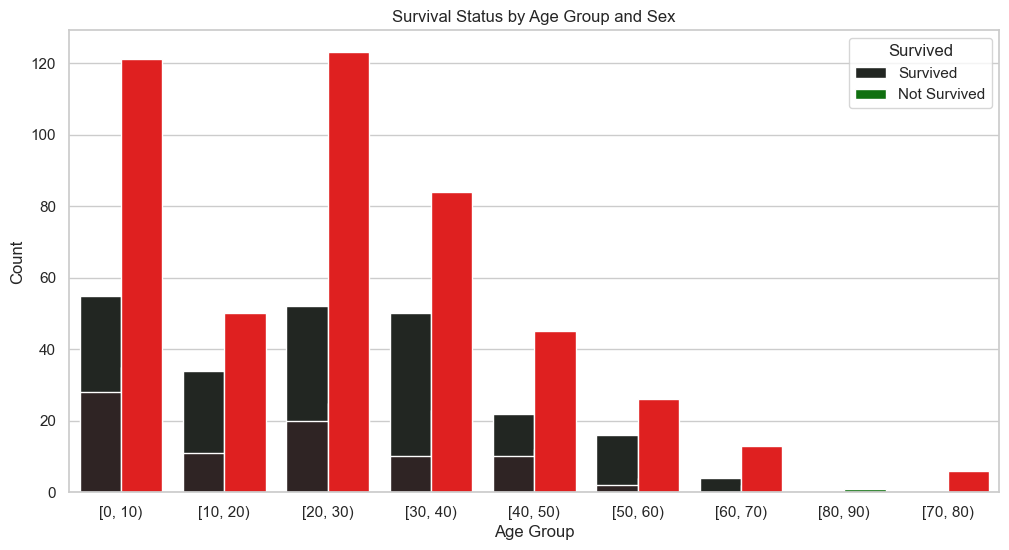

In [37]:
# Multiple Bar Chart - Showing the Age, Sex survival rate - Grouped age distribution

# Create bins for age groups
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 100, 10), right=False)
df['Age Group'] = df['Age Group'].astype(str)  # Convert to string

# Group data by 'Sex', 'Age Group', and 'Survived', and count the number of passengers
grouped_df = df.groupby(['Sex', 'Age Group', 'Survived']).size().reset_index(name='Count')

# Separate the data for survived and not survived passengers
survived_data = grouped_df[grouped_df['Survived'] == 1]
not_survived_data = grouped_df[grouped_df['Survived'] == 0]

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=survived_data, x='Age Group', y='Count', hue='Sex', palette='dark:green', errcolor='black', errwidth=0, ci=None)
sns.barplot(data=not_survived_data, x='Age Group', y='Count', hue='Sex', palette='dark:red', errcolor='black', errwidth=0, ci=None)
plt.title("Survival Status by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Survived', loc='upper right', labels=['Survived', 'Not Survived'])
plt.show()

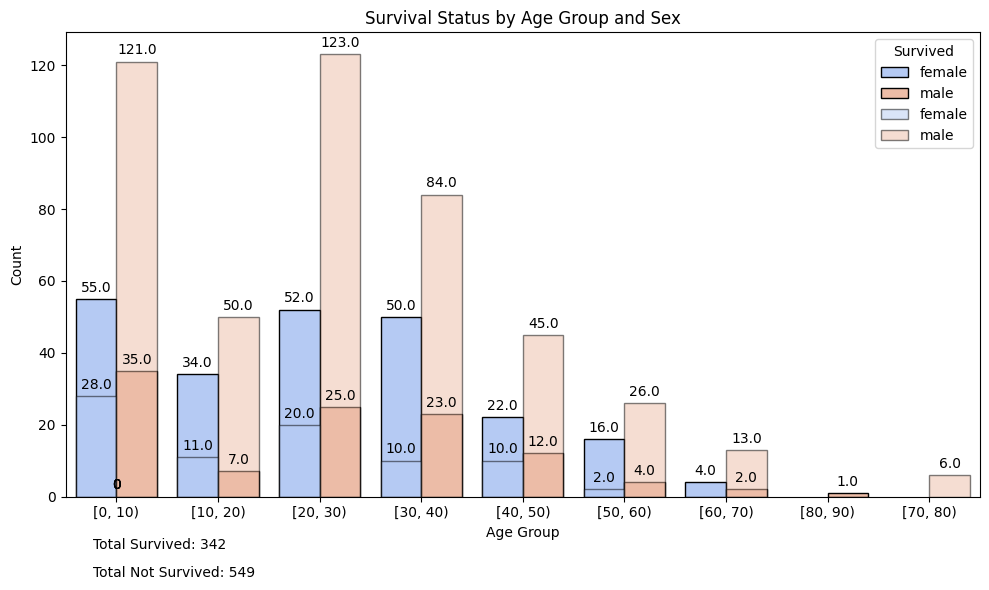

In [29]:
# Multiple barchart with seaborn - Showing the total number of passengers that survived and didn't survive

# Calculate total count for survived and not survived passengers
total_survived_count = survived_data['Count'].sum()
total_not_survived_count = not_survived_data['Count'].sum()

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=survived_data, x='Age Group', y='Count', hue='Sex', palette='coolwarm', edgecolor='black', linewidth=1)
sns.barplot(data=not_survived_data, x='Age Group', y='Count', hue='Sex', palette='coolwarm', edgecolor='black', linewidth=1, alpha=0.5)

# Add count values as annotations
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height}', 
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

# Add total count annotations
plt.annotate(f'Total Survived: {total_survived_count}', 
             xy=(0, 0), 
             xytext=(20, -30), 
             xycoords='axes fraction', 
             textcoords='offset points', 
             fontsize=10, 
             ha='left', va='top')

plt.annotate(f'Total Not Survived: {total_not_survived_count}', 
             xy=(0, 0), 
             xytext=(20, -50), 
             xycoords='axes fraction', 
             textcoords='offset points', 
             fontsize=10, 
             ha='left', va='top')

# Add title and labels
plt.title("Survival Status by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Show legend
plt.legend(title='Survived', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

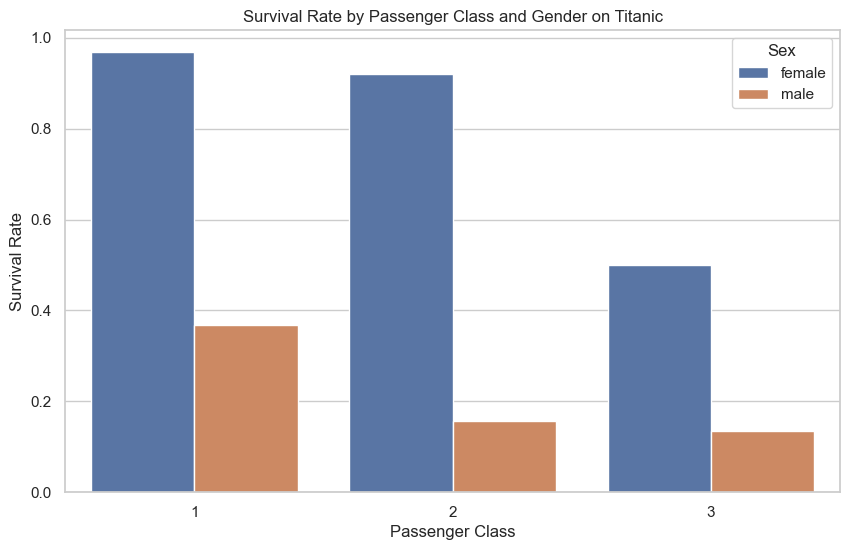

In [38]:
# Group data by Pclass and Sex and calculate survival rates

# Calculate survival rates
survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Passenger Class and Gender on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

# More female passengers survived across all three class

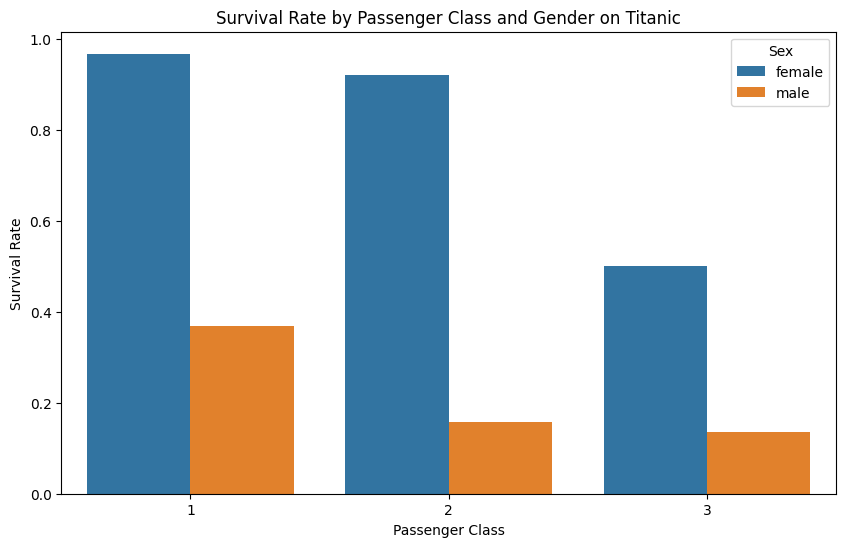

In [31]:
# Group data by Pclass and Sex and calculate survival rates - Using seaborn library
survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Passenger Class and Gender on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

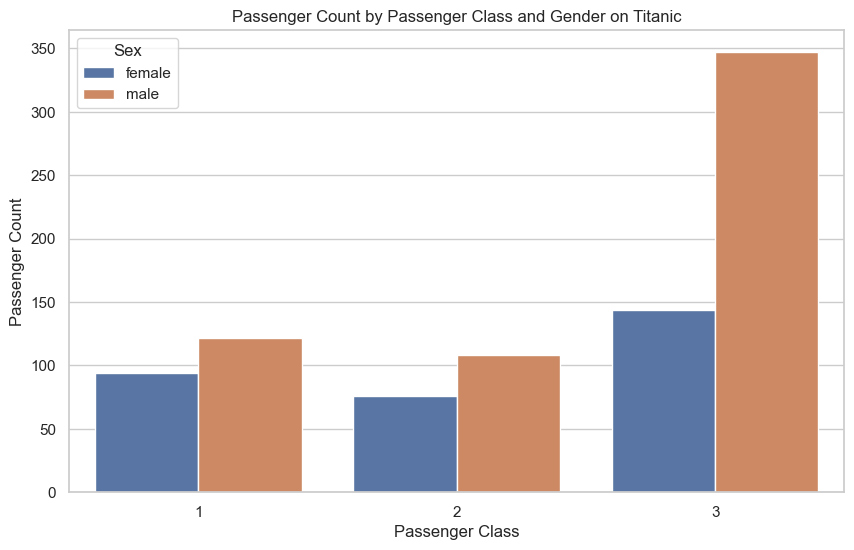

In [39]:
# Group data by Pclass and Sex

# Calculate passenger counts
passenger_counts = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_counts, x='Pclass', y='Count', hue='Sex')
plt.title('Passenger Count by Passenger Class and Gender on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Sex')
plt.show()

# More passengers boarded the 3rd class

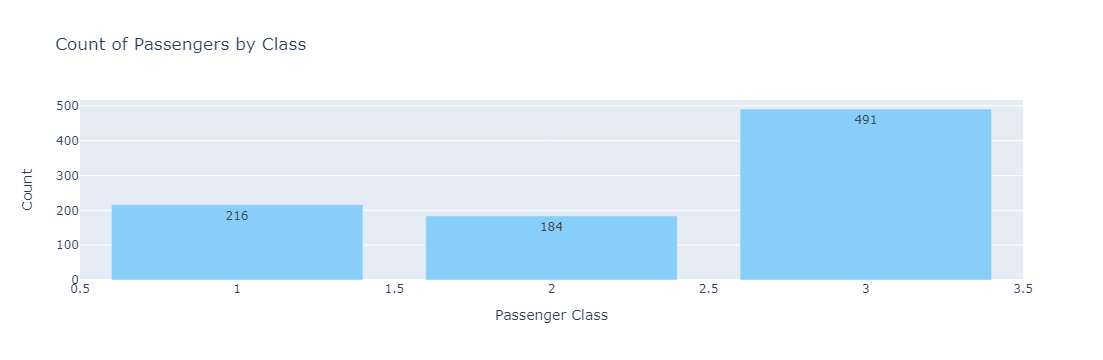

In [33]:
# Counting the occurrences of each passenger class - Total number of passengers per class


<Axes: >

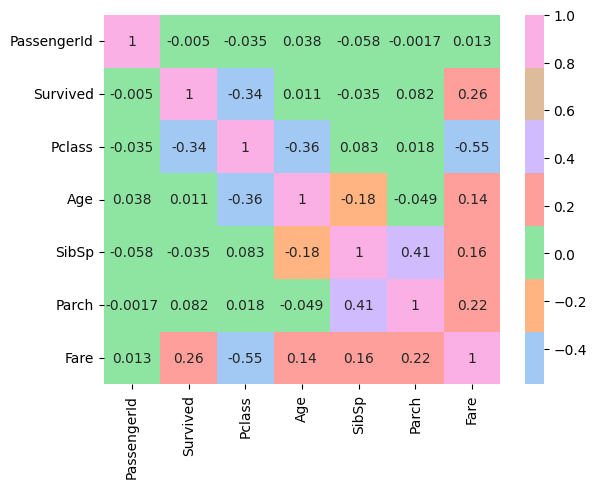

In [34]:
# Heat map showing the correlation between each numeric columns

# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation
correlation = numeric_columns.corr()

# Setting the color palette
pastel_palette = sns.color_palette('pastel', len(correlation))

# Displaying the Heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap=pastel_palette)

The Chi-square test for independence (or "chi-square test of association" or "chi-square test of homogeneity") is used to determine whether there is a significant association between two categorical variables. In this case, we are interested in whether there is a relationship between the "Survived" column (which likely contains binary values indicating whether a passenger survived or not) and the "Pclass" column (which likely contains categorical values indicating the passenger's class).

Here's why the Chi-square test for independence is suitable for this hypothesis:

1. **Categorical Variables**: Both "Survived" and "Pclass" are categorical variables. "Survived" typically represents whether a passenger survived (1) or not (0), and "Pclass" represents different classes of passengers (1st, 2nd, or 3rd class).

2. **Independence Assumption**: The test assesses whether the two categorical variables are independent of each other. In the context of the Titanic dataset, we want to determine if survival is independent of passenger class or if there is a relationship between them.

3. **Expected Frequencies**: The test compares observed frequencies (the actual counts of passengers in each combination of survival and passenger class) with expected frequencies (what would be expected if there were no relationship between the variables). The chi-square statistic quantifies the difference between the observed and expected frequencies.

By using the Chi-square test for independence, we can assess whether there is a statistically significant association between survival and passenger class in the Titanic dataset. If the test yields a low p-value, we reject the null hypothesis of independence and conclude that there is a significant association between the two variables.

Null Hypothesis (H0): There is no association between survival and passenger class in the Titanic dataset.

Alternative Hypothesis (H1): There is an association between survival and passenger class in the Titanic dataset.

In [35]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table (cross-tabulation) of Survived and Pclass
contingency_table = pd.crosstab(df['Survived'], df['Pclass'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square test statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square test statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of freedom: 2
Expected frequencies table:
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


#### Feature Engineering - The process of selecting the right columns for our machine learning models

In [36]:
# List of columns to drop
columns_to_drop = ['PassengerId', 'Age', 'Ticket', 'Age Group', 'Name', 'Cabin']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.25,S
1,1,1,female,1,0,71.28,C
2,1,3,female,0,0,7.92,S
3,1,1,female,1,0,53.10,S
4,0,3,male,0,0,8.05,S


In [38]:
# Converting categorical columns to numeric for machine learning process

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for 'Sex' column and replace the original values
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Apply label encoding for 'Embarked' column and replace the original values
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.25,3
1,1,1,0,1,0,71.28,0
2,1,3,0,0,0,7.92,3
3,1,1,0,1,0,53.10,3
4,0,3,1,0,0,8.05,3
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.00,3
887,1,1,0,0,0,30.00,3
888,0,3,0,1,2,23.45,3
889,1,1,1,0,0,30.00,0


#### Train Split Test

In [39]:
# Splitting our data into 2 categories train and test

from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 6)
X_test shape: (179, 6)
y_train shape: (712,)
y_test shape: (179,)


#### Machine Learning Model

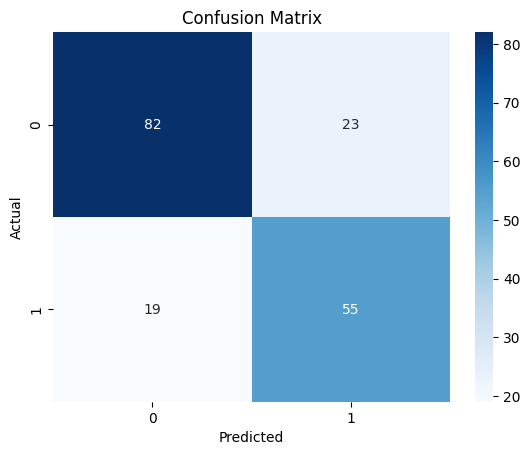

Logistic Regression - Accuracy: 0.7653631284916201
Logistic Regression - Precision: 0.7051282051282052
Logistic Regression - F1 Score: 0.7236842105263158


In [40]:
# Using Logistic Regression model

def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def evaluate(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, f1

def plot_confusion_matrix(y_test, y_pred):
    sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

log_reg_model, y_pred_log_reg = logistic_regression(X_train, y_train, X_test, y_test)
accuracy_log_reg, precision_log_reg, f1_log_reg = evaluate(log_reg_model, y_test, y_pred_log_reg)
plot_confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression - Accuracy:", accuracy_log_reg)
print("Logistic Regression - Precision:", precision_log_reg)
print("Logistic Regression - F1 Score:", f1_log_reg)

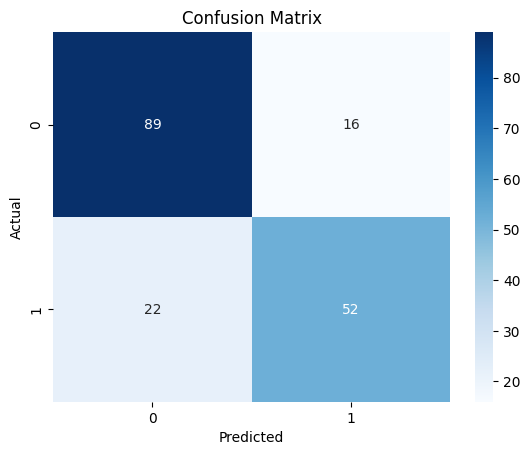

Decision Trees - Accuracy: 0.7877094972067039
Decision Trees - Precision: 0.7647058823529411
Decision Trees - F1 Score: 0.7323943661971831


In [41]:
# Using decision tree

def decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

dt_model, y_pred_dt = decision_tree(X_train, y_train, X_test, y_test)
accuracy_dt, precision_dt, f1_dt = evaluate(dt_model, y_test, y_pred_dt)
plot_confusion_matrix(y_test, y_pred_dt)
print("Decision Trees - Accuracy:", accuracy_dt)
print("Decision Trees - Precision:", precision_dt)
print("Decision Trees - F1 Score:", f1_dt)

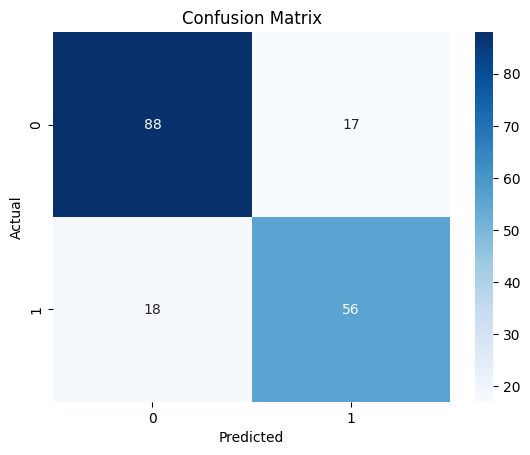

Random Forests - Accuracy: 0.8044692737430168
Random Forests - Precision: 0.7671232876712328
Random Forests - F1 Score: 0.7619047619047619


In [42]:
# Using random forest

def random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

rf_model, y_pred_rf = random_forest(X_train, y_train, X_test, y_test)
accuracy_rf, precision_rf, f1_rf = evaluate(rf_model, y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf)
print("Random Forests - Accuracy:", accuracy_rf)
print("Random Forests - Precision:", precision_rf)
print("Random Forests - F1 Score:", f1_rf)

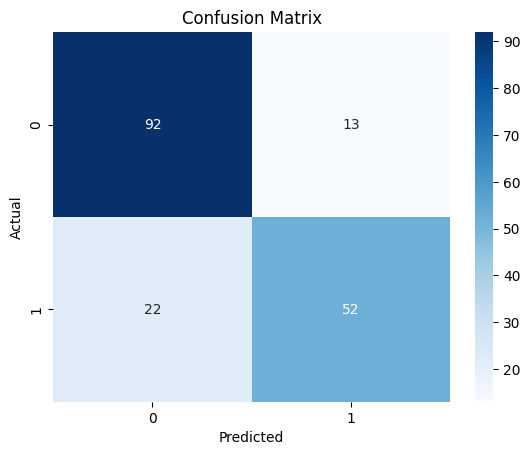

Support Vector Machine - Accuracy: 0.8044692737430168
Support Vector Machine - Precision: 0.8
Support Vector Machine - F1 Score: 0.7482014388489209
Support Vector Machine - Model Score: 0.8044692737430168


In [43]:
# Using support vector machine

def svc(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = SVC()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = model.score(X_test_scaled, y_test)
    return model, y_pred, score




svc_model, y_pred_svc, score_svc = svc(X_train, y_train, X_test, y_test)
accuracy_svc, precision_svc, f1_svc = evaluate(svc_model, y_test, y_pred_svc)
plot_confusion_matrix(y_test, y_pred_svc)
print("Support Vector Machine - Accuracy:", accuracy_svc)
print("Support Vector Machine - Precision:", precision_svc)
print("Support Vector Machine - F1 Score:", f1_svc)
print("Support Vector Machine - Model Score:", score_svc)



K-Nearest Neighbors - Accuracy: 0.7932960893854749
K-Nearest Neighbors - Precision: 0.7605633802816901
K-Nearest Neighbors - F1 Score: 0.7448275862068966


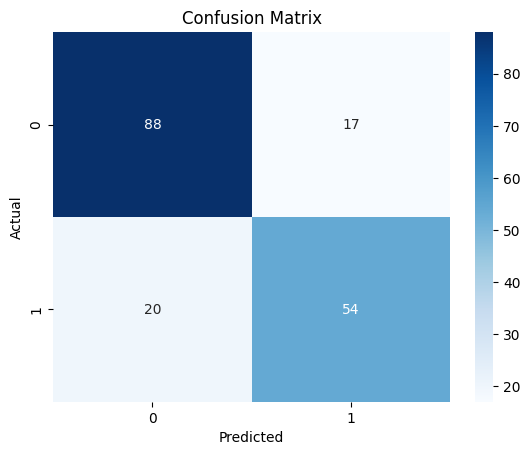

In [44]:
# Using K-NN model

from sklearn.neighbors import KNeighborsClassifier

def knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    return model, y_pred

knn_model, y_pred_knn = knn(X_train, y_train, X_test, y_test, n_neighbors=5)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("K-Nearest Neighbors - Accuracy:", accuracy_knn)
print("K-Nearest Neighbors - Precision:", precision_knn)
print("K-Nearest Neighbors - F1 Score:", f1_knn)

# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn)

#### Our best model for this analysis is Support Vector Machine
#### With an Accuracy score of 80.44% #### And Precision Score of 80%8